In [1]:
# Activation Function
# Sigmoid - Binary Classification
# Relu - Regression / Clasttification

In [2]:
import matplotlib.pyplot as plt
import numpy as np

<function matplotlib.pyplot.show>

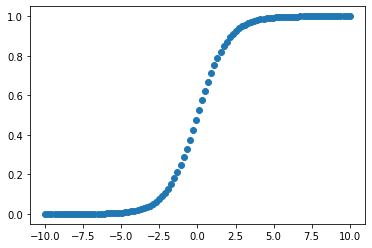

In [3]:
x = np.linspace(-10,10,100)
y = 1/(1+np.exp(-x))
plt.scatter(x,y)
plt.show

In [4]:
# Relu - Rectified Linear Unit
# WAP to represent relu

# If x>0 , x
# If x<0 , 0
# x = [1,2,3,4,-1,-4,-9]
# y = [1,2,3,4,0,0,0]

<function matplotlib.pyplot.show>

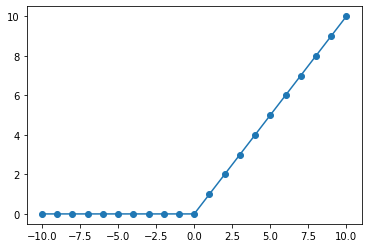

In [5]:
x = np.linspace(-10,10,21)
y = x*(x>0)
plt.scatter(x,y)
plt.plot(x,y)
plt.show

In [6]:
# Loss function

# Regression : Mean Squared Error
# Classification : Cross Entropy

In [7]:
y_pred = np.array([100,200,300])
y_real = np.array([110,210,280])

In [8]:
np.mean(np.square(np.subtract(y_pred,y_real)))

200.0

In [9]:
# Types of layers in Keras
# 1. Dense layer : Normally connected layer
# 2. 

In [10]:
# Steps required for ANN
# Step 1 - Load the dataset and consider input as well as output
# Step 2 - Processing of data (scaling)
# Step 3 - NN Architecture
# Step 4 - Compile the model
# Step 5 - Train the model
# Step 6 - Predict and Evaluate

In [11]:
# Step 1

In [12]:
import tensorflow as tf

In [13]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path="boston_housing.npz", test_split=0.2, seed=113)

65536/57026 [==================================] - 0s 0us/step


In [14]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [15]:
# Dataframe for Training Data
import pandas as pd
df = pd.DataFrame(x_train)
df['Target'] = y_train
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,Target
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7


In [16]:
 # Step 2
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
x_train_scaled = s.fit_transform(x_train)
x_test_scaled = s.transform(x_test)                                

In [17]:
# Step 3 - NN Architecture
# no of nurons
# Inout Layer - no.of input values = 13
# Hidden Layer - in between the values of input and output = let it be 7
# Output Layer - 1 mostly for regrssion = 1

In [18]:
# Parameters - Weight & Bias

In [19]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(7,input_shape=(13,), activation='relu'))
model.add(tf.keras.layers.Dense(1))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 98        
                                                                 
 dense_1 (Dense)             (None, 1)                 8         
                                                                 
Total params: 106
Trainable params: 106
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Hidden layer
# Weights
print(13*7)
# Bias
print(7)
# Param = Weight + Bias
print((13*7)+7)

91
7
98


In [22]:
# Output layer
# Weights
print(7*1)
# Bias
print(1)
# Param = Weight + Bias
print((7*1)+1)

7
1
8


In [23]:
# Step 4 : Compile the model

model.compile?

model.compile(optimizer='rmsprop',loss='mean_squared_error')

In [24]:
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
13/13 [==============================] - 1s 4ms/step - loss: 7921.3633
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 3049.0532
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 1285.2240
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 820.4633
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 702.0506
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 618.1992
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 547.4435
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 493.1966
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 441.9704
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 401.8908
Epoch 11/100
13/13 [==============================] - 0s 11ms/step - loss: 362.3947
Epoch 12/100
13/13 [==============================] - 0s 5ms/step - loss: 323.0635
Epoch 13/

In [25]:
y_pred = model.predict(x_test)
y_pred[0:5]

array([[ 4.815529],
       [18.815695],
       [24.487951],
       [27.646036],
       [24.132408]], dtype=float32)

In [26]:
y_test[0:5]

array([ 7.2, 18.8, 19. , 27. , 22.2])

In [27]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5554837848838143

In [31]:
# For multiple values
model.predict(x_test[0:2])

array([[ 4.815507],
       [18.815672]], dtype=float32)

In [30]:
# For single value
model.predict(x_test[0].reshape(1,13))

array([[4.815529]], dtype=float32)